In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## The library that I found from the internet.
# Y Data Profiling

In [37]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('heart.csv')
profile = ProfileReport(df, title="Profiling Report")
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Additional variable descriptions to help us

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

Import Data


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Characteristic of data

In [4]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std   

In [6]:
# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [7]:
# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [9]:
# Display unique values in a specific column (e.g., 'target')
print("\nUnique Values in 'output' column:")
print(df['output'].unique())



Unique Values in 'output' column:
[1 0]


In [10]:
#check uniqe value in row 
df.apply(lambda x: len(x.unique()))

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# Data cleansing 

In [11]:
# Fine missing values
df.dropna(inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data visualization

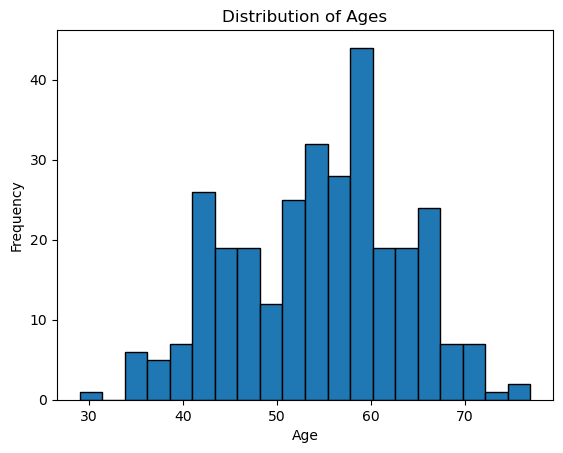

In [12]:
# Plot a histogram of the 'age' column
df['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

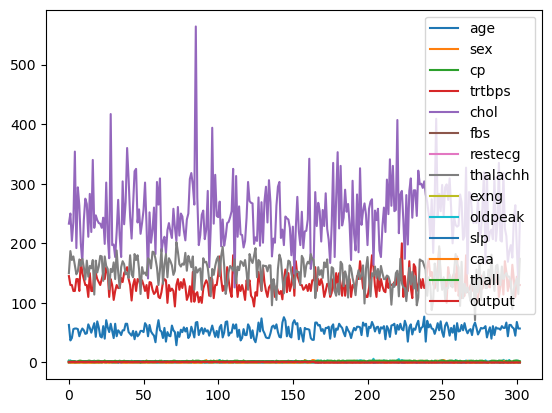

In [13]:
df.plot()


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

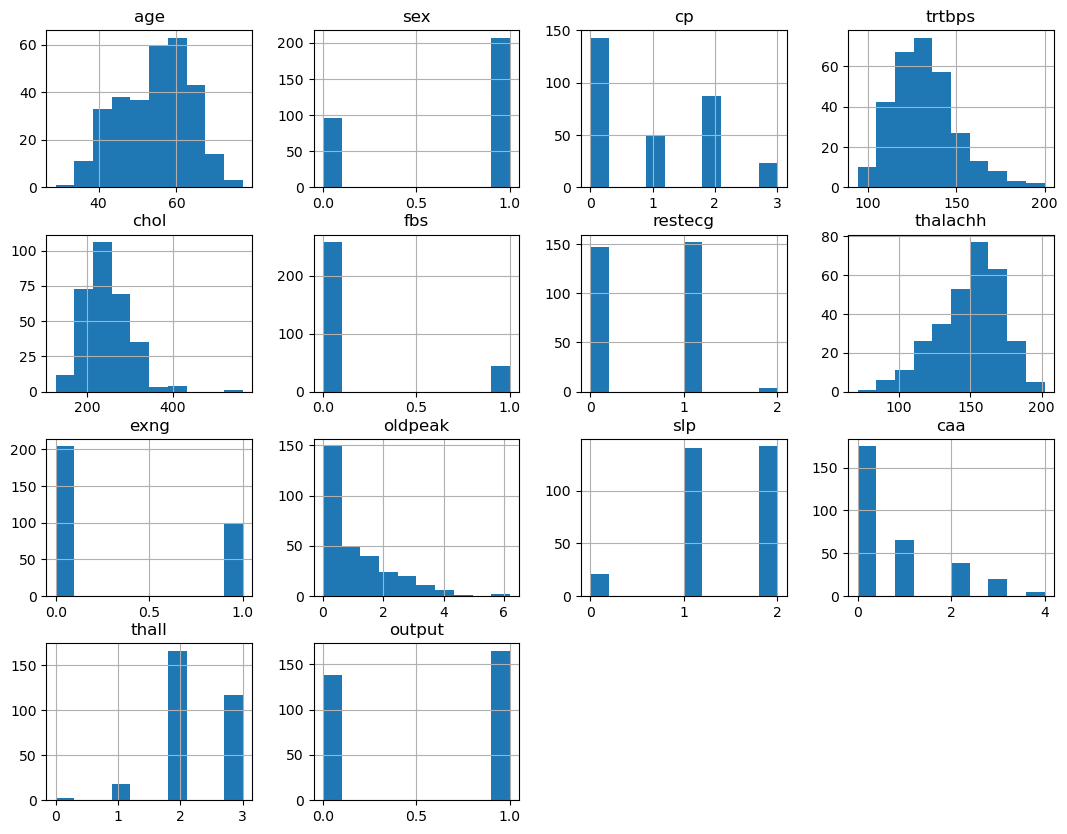

In [14]:
df.hist(figsize=(13,10))

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_12796\3520114950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], bins = 25)


<Axes: xlabel='thalachh', ylabel='Density'>

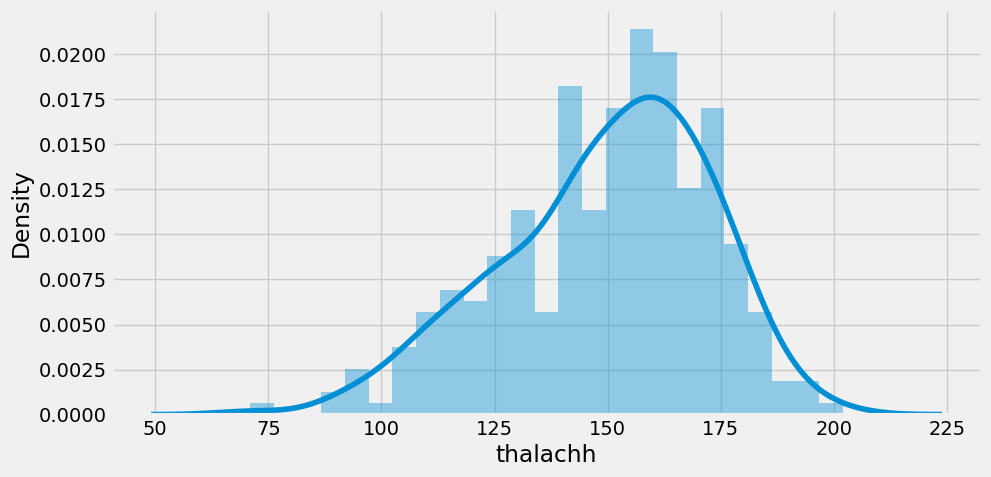

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(df['thalachh'], bins = 25)

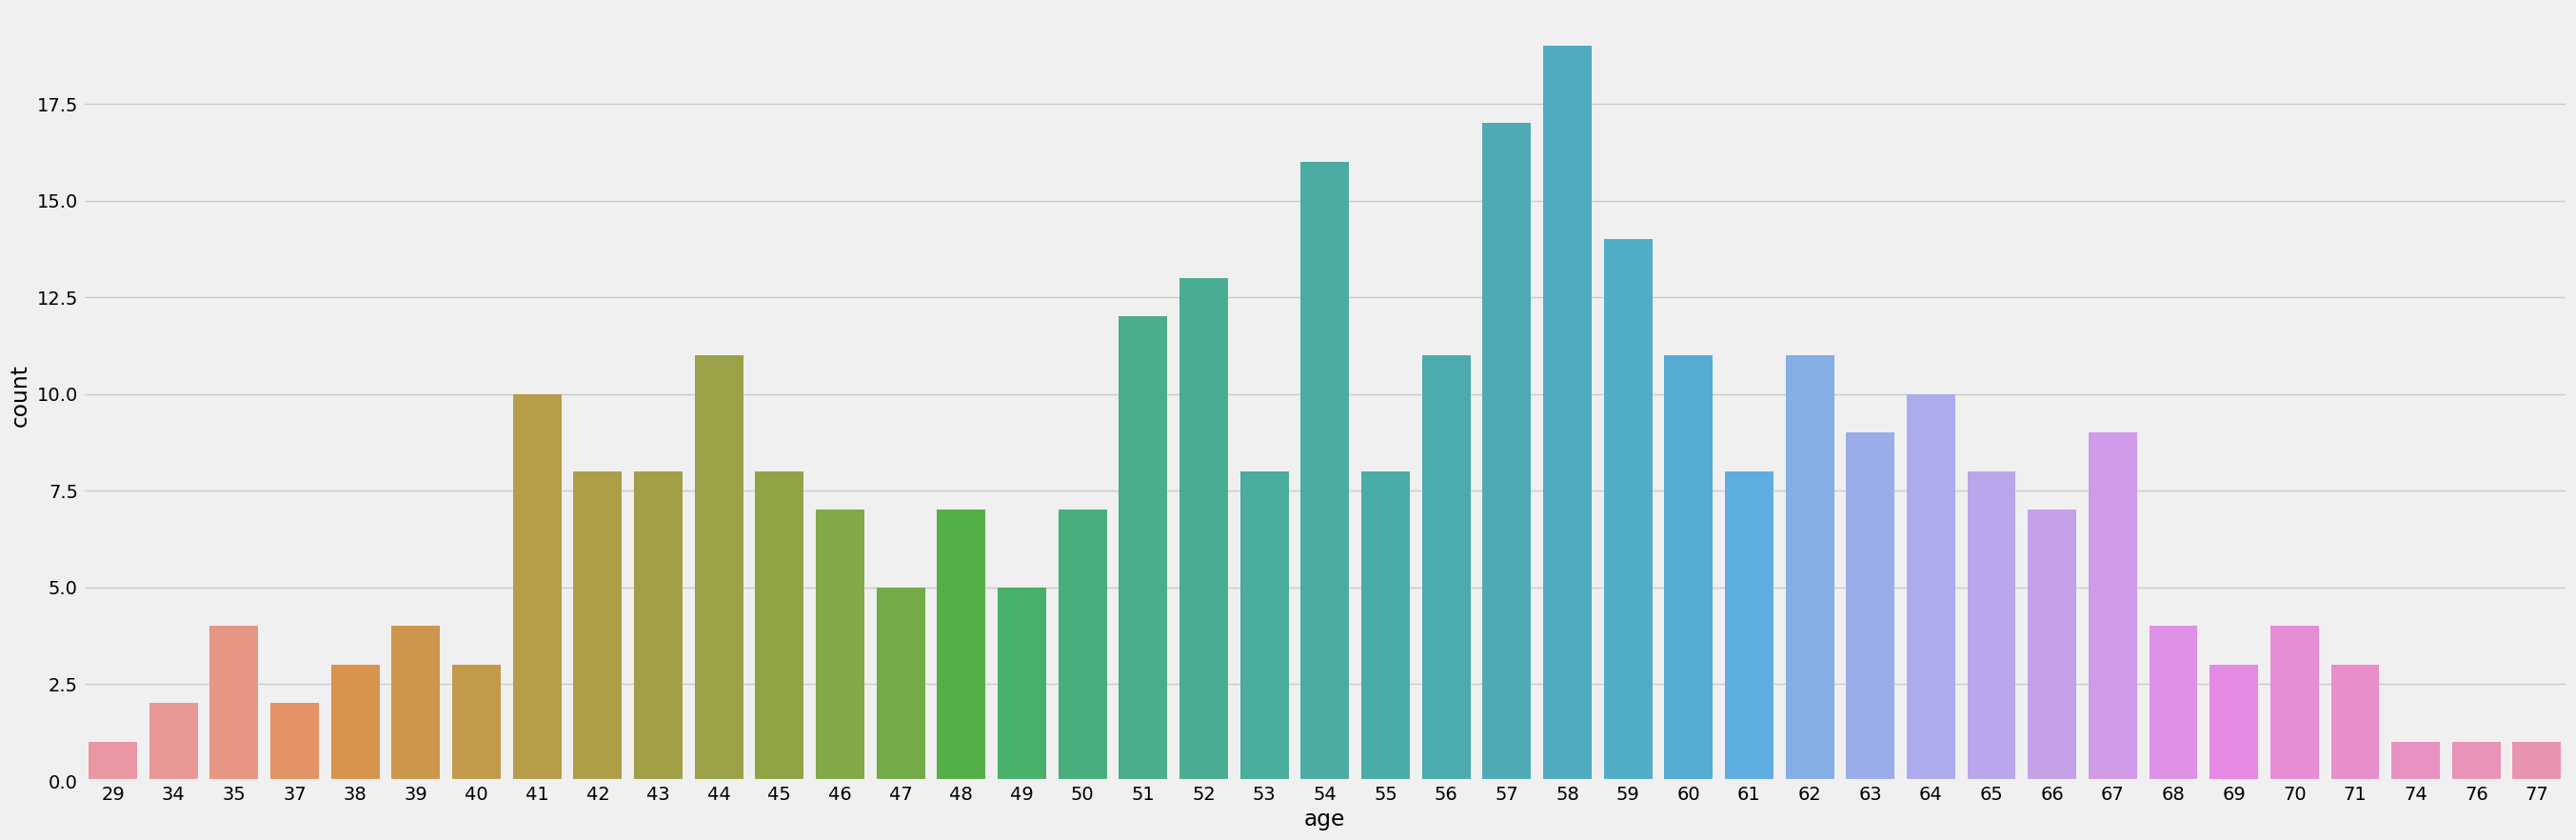

In [16]:
plt.figure(figsize = (30, 10))
sns.countplot(x='age', data=df)
plt.show()

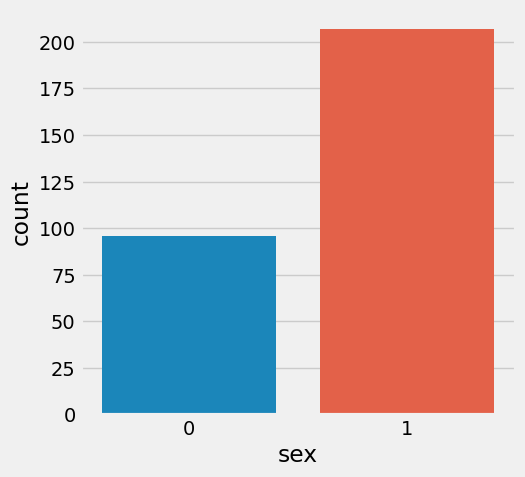

In [17]:
plt.figure(figsize = (5, 5))
sns.countplot(x='sex', data=df)
plt.show()

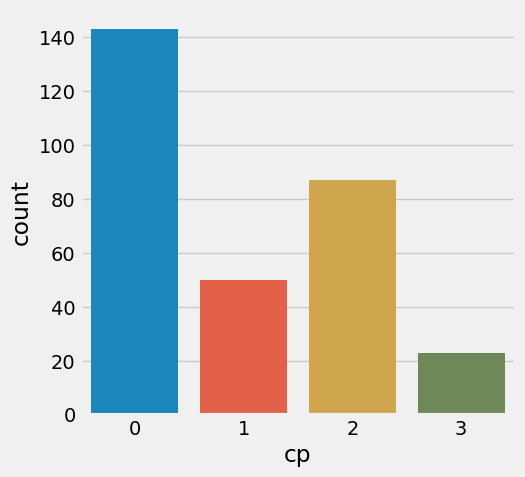

In [18]:
plt.figure(figsize = (5, 5))
sns.countplot(x='cp', data=df)
plt.show()

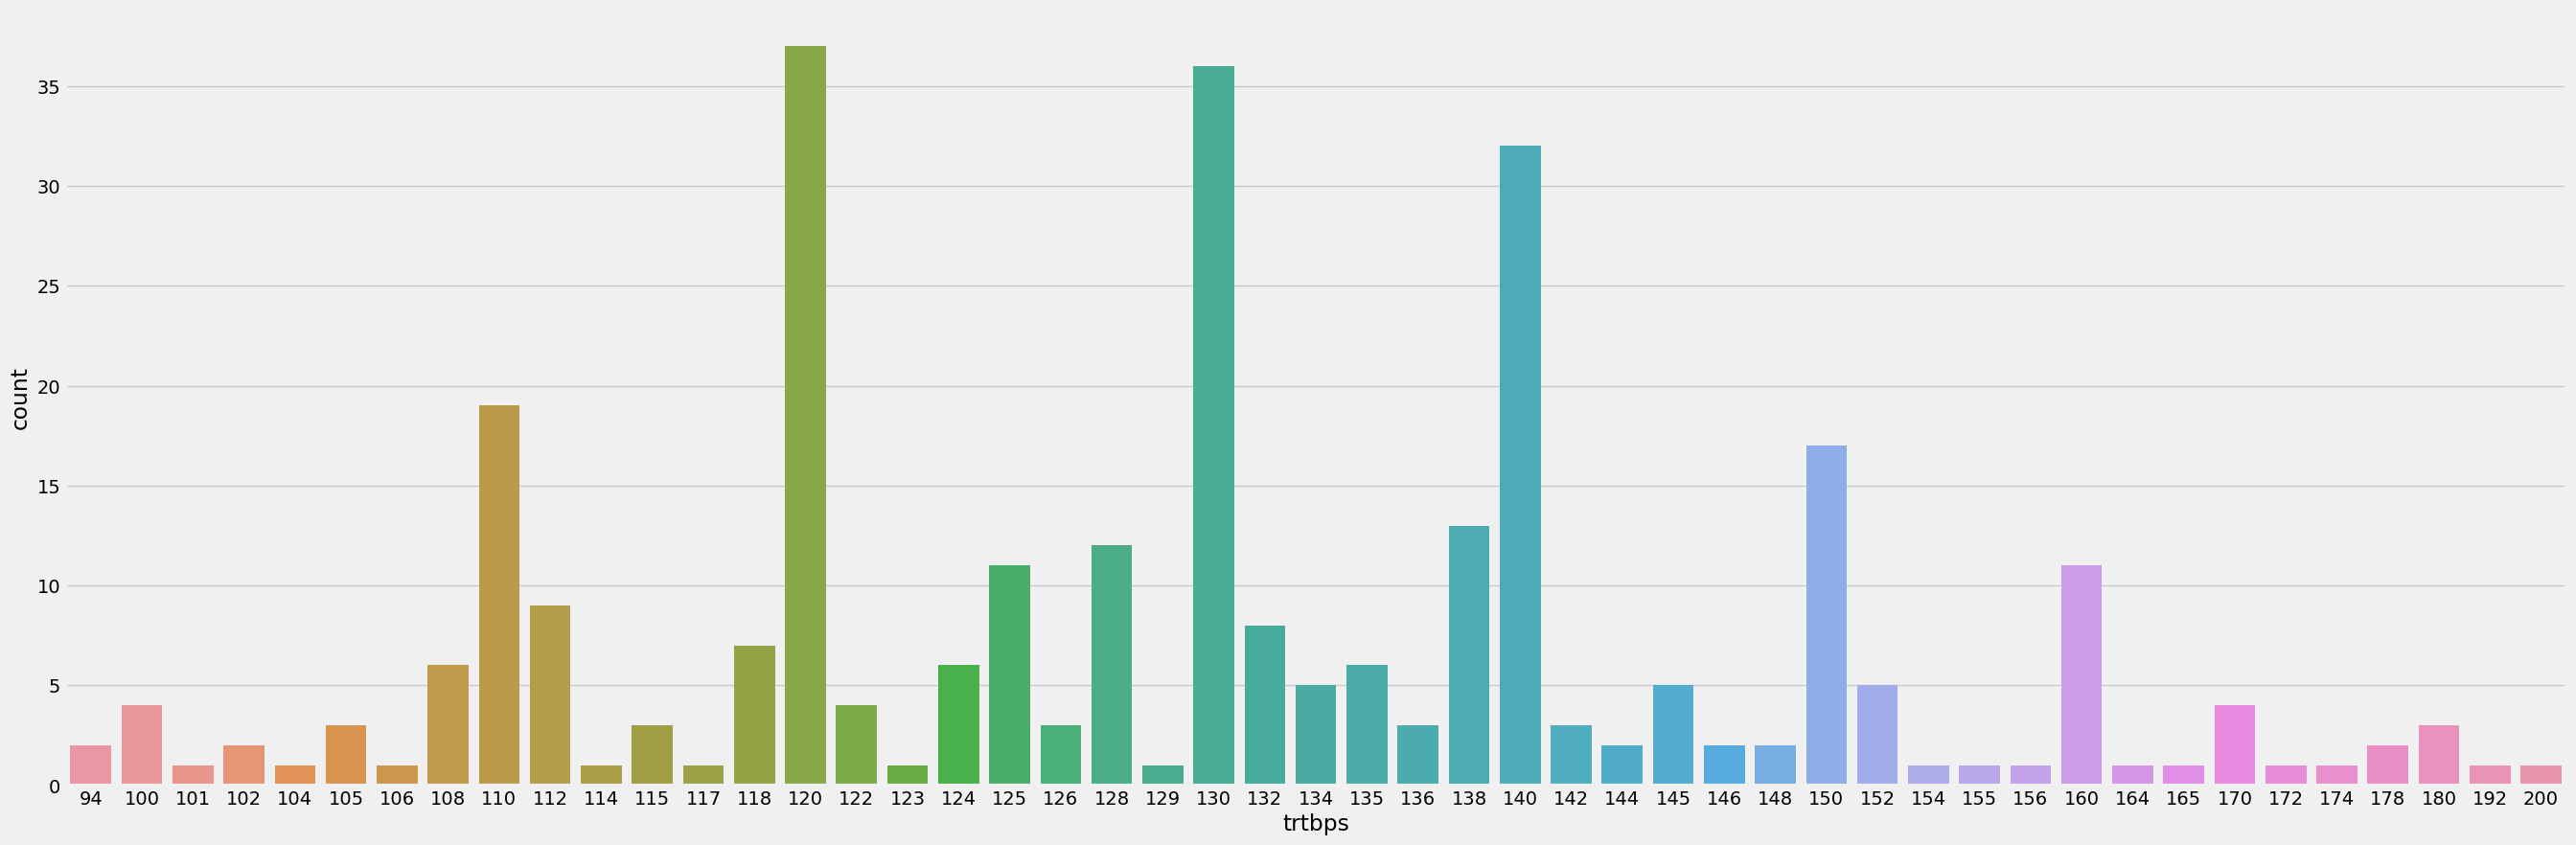

In [19]:
plt.figure(figsize = (30, 10))
sns.countplot(x='trtbps', data=df)
plt.show()

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_12796\1163162874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], bins = 25)


<Axes: xlabel='chol', ylabel='Density'>

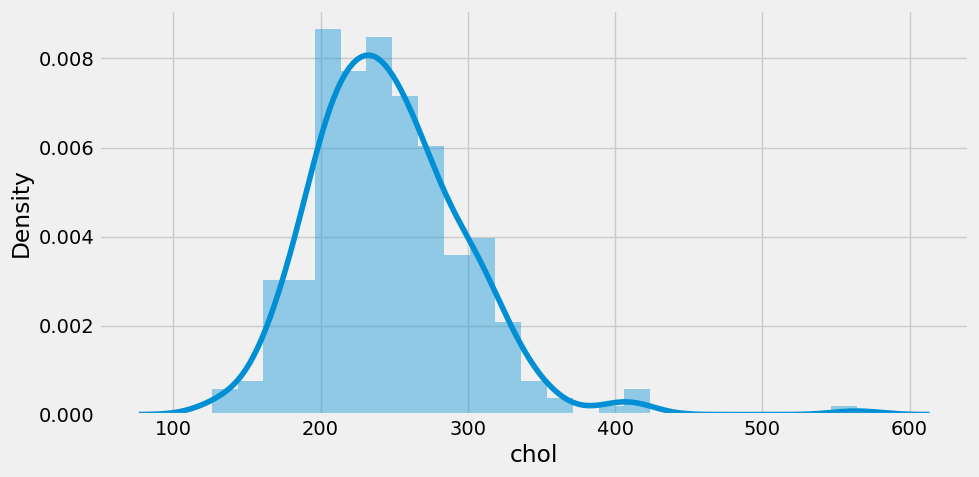

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(df['chol'], bins = 25)

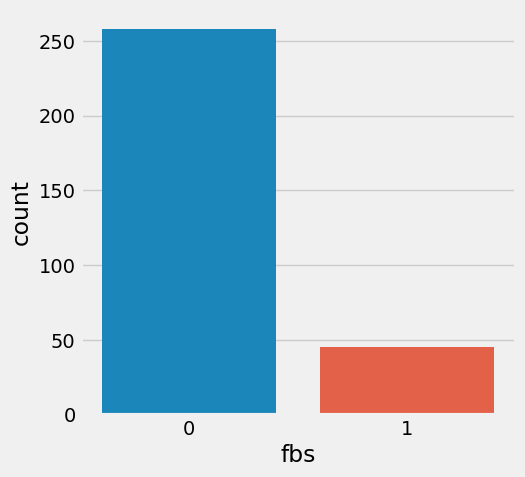

In [21]:
plt.figure(figsize = (5, 5))
sns.countplot(x='fbs', data=df)
plt.show()

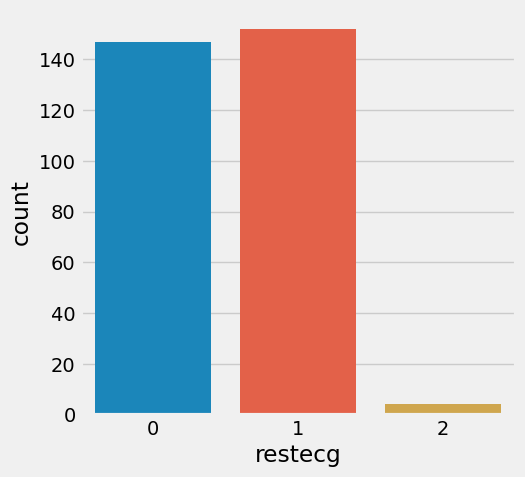

In [22]:
plt.figure(figsize = (5, 5))
sns.countplot(x='restecg', data=df)
plt.show()

C:\Users\Thear Sithysak\AppData\Local\Temp\ipykernel_12796\3520114950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], bins = 25)


<Axes: xlabel='thalachh', ylabel='Density'>

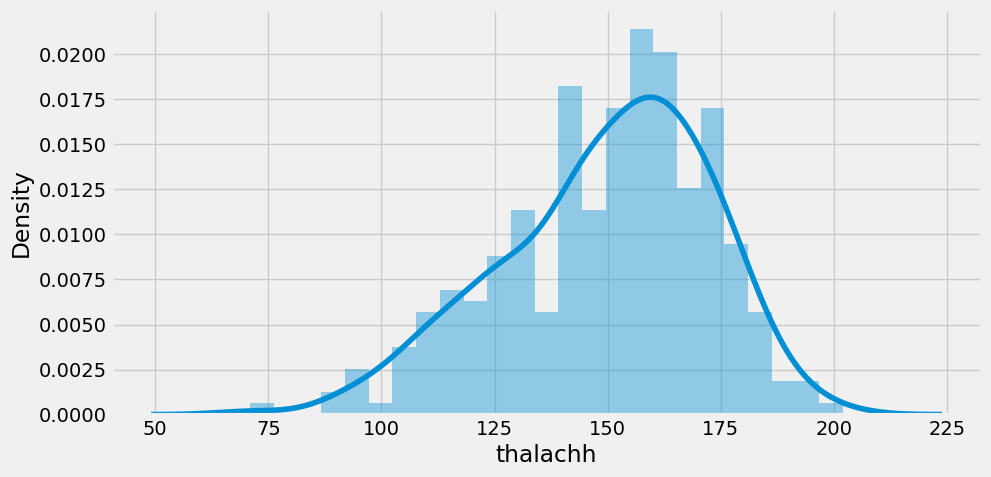

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(df['thalachh'], bins = 25)

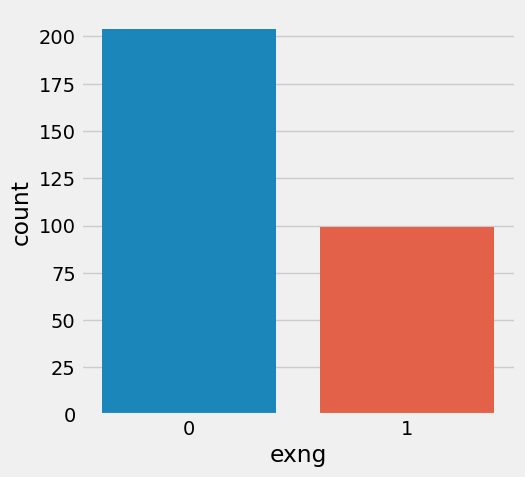

In [24]:
plt.figure(figsize = (5, 5))
sns.countplot(x='exng', data=df)
plt.show()

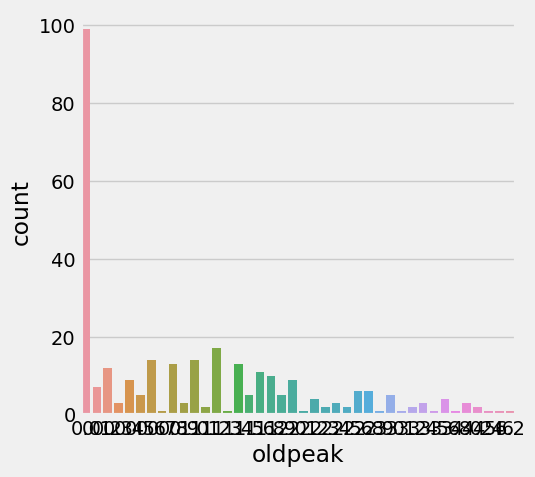

In [25]:
plt.figure(figsize = (5, 5))
sns.countplot(x='oldpeak', data=df)
plt.show()

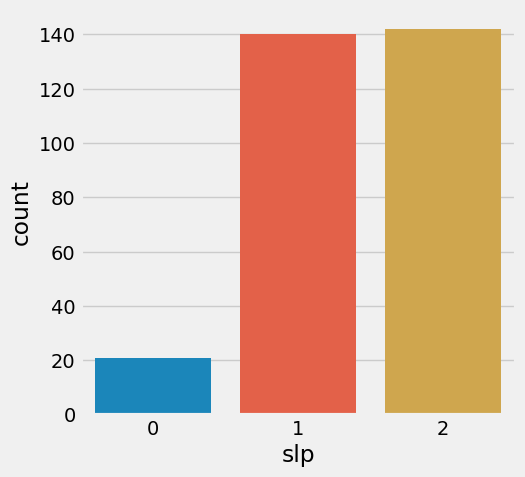

In [26]:
plt.figure(figsize = (5, 5))
sns.countplot(x='slp', data=df)
plt.show()

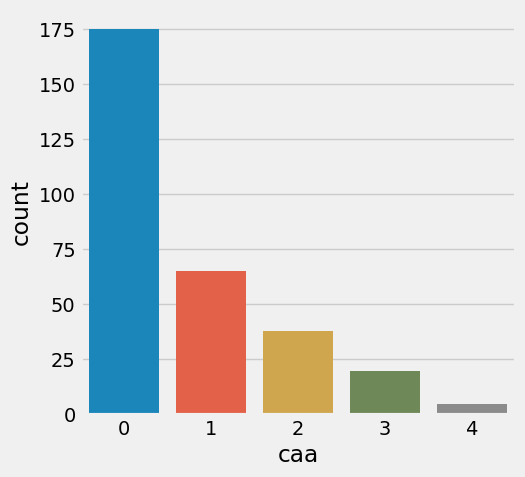

In [27]:
plt.figure(figsize = (5, 5))
sns.countplot(x='caa', data=df)
plt.show()

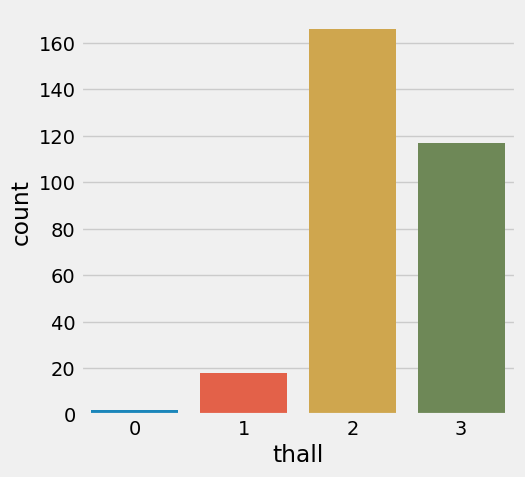

In [28]:
plt.figure(figsize = (5, 5))
sns.countplot(x='thall', data=df)
plt.show()

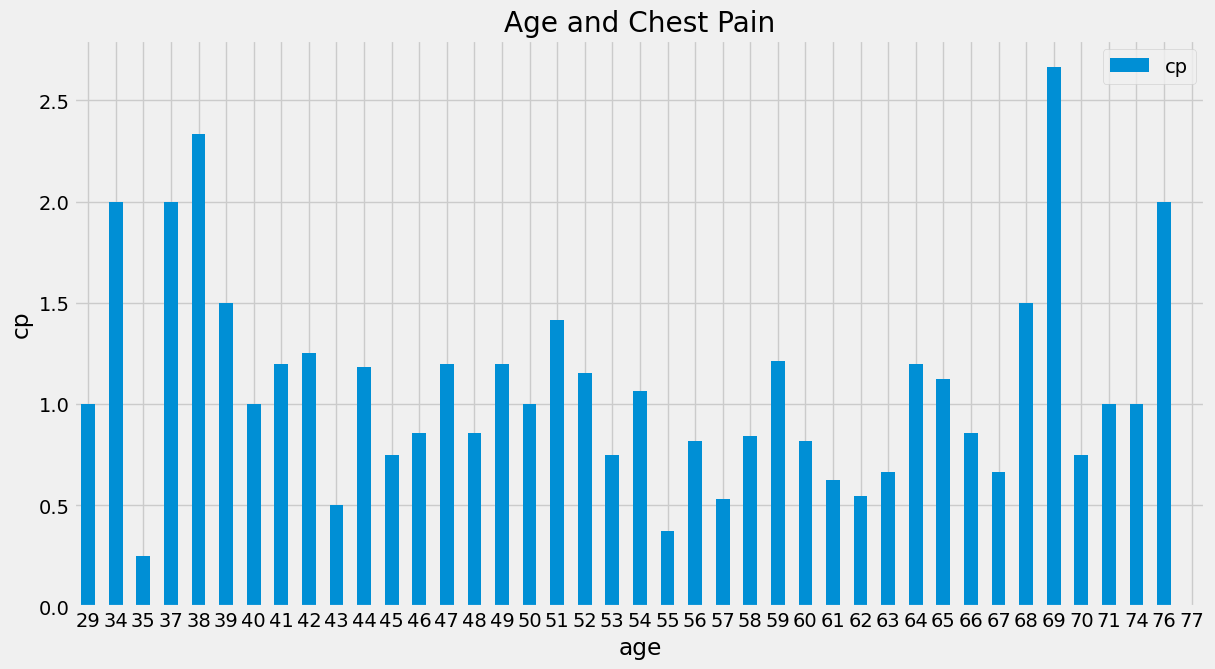

In [29]:
age_plot = df.pivot_table(index = 'age', values = 'cp', aggfunc = np.mean)
age_plot.plot(kind = 'bar', figsize = (13, 7))
plt.xlabel('age')
plt.ylabel('cp')
plt.title('Age and Chest Pain')
plt.xticks(rotation = 0)
plt.show()

In [30]:
X = df.drop(['output'], axis=1)
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y = df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

# Split Data to 30% Test and 70% Train

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\Thear Sithysak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model prediction on Test Dataset (prediction)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

# Model Evaluation - Model performance

In [36]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(f"    Metrics - Confusion Matrix: \n", cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"    Metrics - Accuracy Score:       {accuracy}")

precision = metrics.precision_score(y_test, y_pred)
print(f"    Metrics - Precision Score:      {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"    Metrics - Recall Score:         {recall}")

f1 = metrics.f1_score(y_test, y_pred)
print(f"    Metrics - F1-Score:             {f1}")

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f"    Metrics - ROC AUC Score:        {roc_auc}")

    Metrics - Confusion Matrix: 
 [[32  9]
 [ 8 42]]
    Metrics - Accuracy Score:       0.8131868131868132
    Metrics - Precision Score:      0.8235294117647058
    Metrics - Recall Score:         0.84
    Metrics - F1-Score:             0.8316831683168315
    Metrics - ROC AUC Score:        0.8102439024390243


In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
features.plot(kind = 'bar', title = 'Feature Importance')

NameError: name 'train' is not defined